In [2]:
from osgeo import gdal
import rasterio
import os
import matplotlib.pyplot as plt
import numpy as np

In [3]:
ds = gdal.Open("fireline_intensity/new_fire/farsite_arrival_time_medium_buffer_0.TIF")

In [4]:
ds.GetMetadata()

{'AREA_OR_POINT': 'Area'}

In [5]:
band = ds.GetRasterBand(1)
arr = band.ReadAsArray()

raster_np = np.array(arr)
raster_np_f = raster_np.flatten()
raster_np_f = raster_np_f[raster_np_f>=0]

In [5]:
arr[arr<0] = np.nan

Text(0, 0.5, 'Row #')

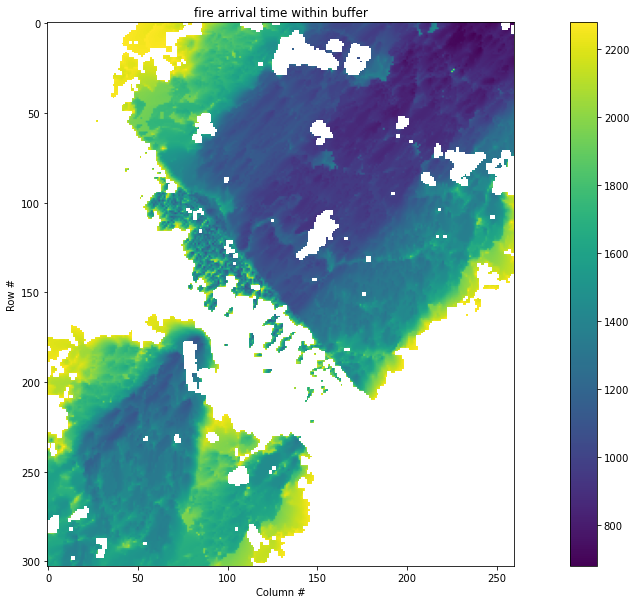

In [6]:
plt.figure(figsize=(20,10))
plt.imshow(arr[436:739,605:865])

plt.colorbar()
plt.title('fire arrival time within buffer'.format(raster_np.shape))
plt.xlabel('Column #')
plt.ylabel('Row #')

In [7]:
np.max(raster_np_f)

2279.9902

In [8]:
raster = raster_mask_1.flatten()
raster = raster[raster>0]
raster
d = 100
left_of_first_bin = 0
right_of_last_bin = raster.max() + d/2

NameError: name 'raster_mask_1' is not defined

In [253]:
len(raster)

4835

In [522]:
raster = raster_mask.flatten()
raster = raster[raster>0]
raster
np.mean(raster)

861.88477

In [295]:
raster.max()

2279.762

In [93]:
d =500

In [524]:
len(raster)

46

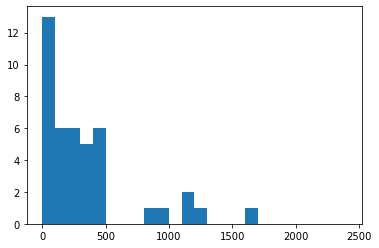

In [525]:
plt.hist(raster, np.arange(left_of_first_bin, right_of_last_bin + d, 100))
plt.show()

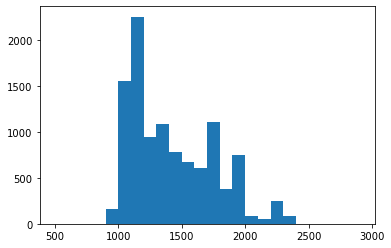

In [96]:
plt.hist(raster, np.arange(left_of_first_bin+d, right_of_last_bin + d, 100))
plt.show()

In [20]:
ogr2ogr -f 'ESRI Shapefile' output.shp 2090_rcp45_banana633/Tubbs_urban_to_TL2_rcp45_banana633_2090_1010_0200.kml

SyntaxError: invalid syntax (<ipython-input-20-521f355ee28b>, line 1)

In [ ]:
satellite_value = raster_np.flatten()
satellite_value = satellite_value[satellite_value>=0]
d = np.diff(np.unique(satellite_value)).min()
left_of_first_bin = satellite_value.min() - float(d)/2
right_of_last_bin = satellite_value.max() + float(d)/2
plt.hist(satellite_value, np.arange(left_of_first_bin, right_of_last_bin + d, d))
plt.show()

In [155]:
raster_mask[436][606]

-1.0

In [224]:
fireline_on_edge = []
for i in range(400):
    fireline_on_edge.append(raster_mask[438 + i][605 + i])
    raster_mask[439 + i][605 + i] = 0

Text(0, 0.5, 'Row #')

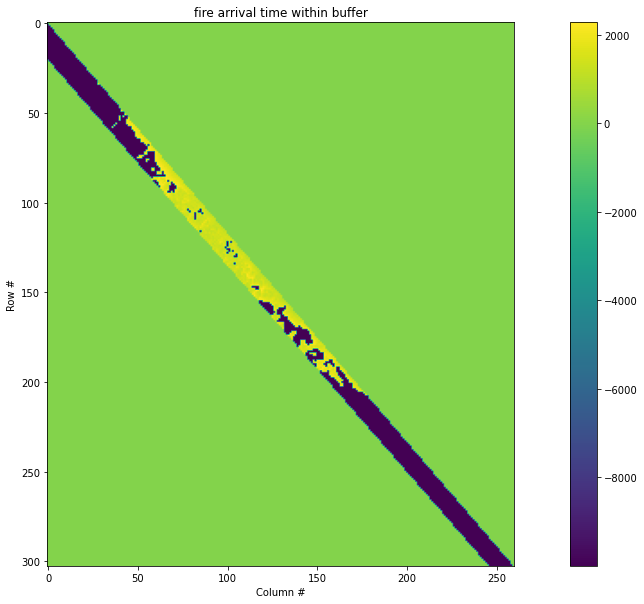

In [284]:
plt.figure(figsize=(20,10))
plt.imshow(raster_mask[436:739,605:865])

plt.colorbar()
plt.title('fire arrival time within buffer'.format(raster_np.shape))
plt.xlabel('Column #')
plt.ylabel('Row #')

Text(0, 0.5, 'Row #')

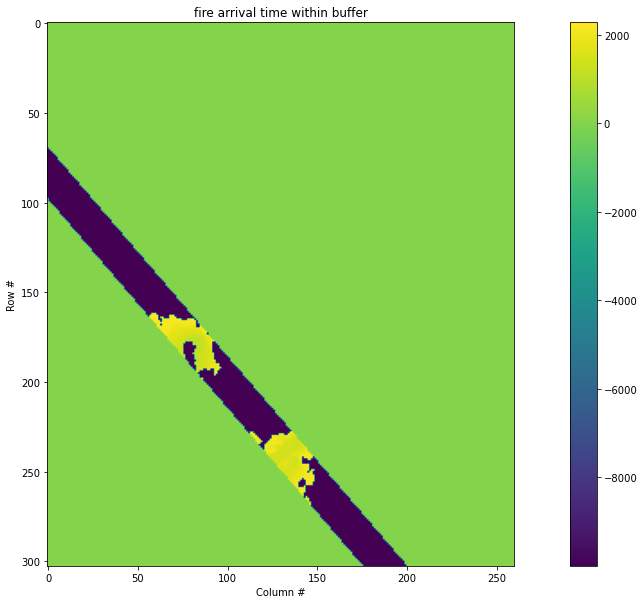

In [257]:
plt.figure(figsize=(20,10))
plt.imshow(raster_mask_1[436:739,605:865])

plt.colorbar()
plt.title('fire arrival time within buffer'.format(raster_np.shape))
plt.xlabel('Column #')
plt.ylabel('Row #')

In [ ]:
A: (865, 739) B: (605,436)

In [ ]:
260/303x+69955/303

xmax: 865 ymax: 436
xmax index 1 xmax ~ y:" 739
ymax index 0 ymax ~ x:" 605


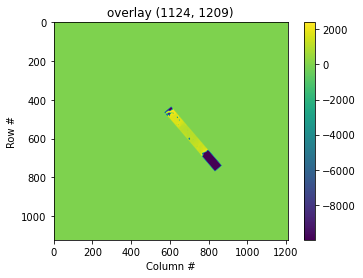

In [111]:
raster_mask = zonal_buffer("fireline_intensity/fireline_machine_3/Experiment_batch/farsite_arrival_time_no_buffer_RCP85_1.TIF","testing_buffer/buffer_polygon_standard_1.shp",0)

In [143]:
raster = raster_mask.flatten()
raster = raster[raster>0]
raster
np.mean(raster)

1784.873

xmax: 865 ymax: 436
xmax index 1 xmax ~ y:" 739
ymax index 0 ymax ~ x:" 605


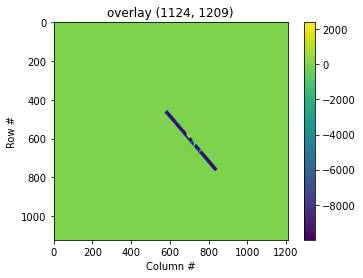

In [142]:
raster_mask = zonal_buffer_minus("fireline_intensity/fireline_machine_1/buffer_sizes_fireline_intensity/farsite_arrival_time_1280_buffer_rcp45_3.TIF", "testing_buffer/buffer_polygon_standard_3.shp", "testing_buffer/buffer_polygon_standard_1.shp", 1)

In [6]:
import gdal as gd
import ogr, osr
import numpy

def zonal_buffer(rasters, buffer, target_value):
    #Open landscape raster data which is lcp
    rasters = gd.Open(rasters)
    
    #Open buffer data that is a shape file
    driver = ogr.GetDriverByName('ESRI Shapefile')
    shp = driver.Open(buffer)
    lyr = shp.GetLayer()
    
    # get raster georeference info
    transform = rasters.GetGeoTransform()
    xOrigin = transform[0]
    yOrigin = transform[3]
    pixelWidth = transform[1]
    pixelHeight = transform[5]
    
    # reproject geometry to same projection as raster
    sourceSR = lyr.GetSpatialRef()
    targetSR = osr.SpatialReference()
    targetSR.ImportFromWkt(rasters.GetProjectionRef())
    coordTrans = osr.CoordinateTransformation(sourceSR,targetSR)
    feat = lyr.GetNextFeature()
    geom = feat.GetGeometryRef()
    geom.Transform(coordTrans)
    
    # Get extent of geometry
    ring = geom.GetGeometryRef(0)
    numpoints = ring.GetPointCount()
    pointsX = []; pointsY = []
    for p in range(numpoints):
            lon, lat, z = ring.GetPoint(p)
            pointsX.append(lon)
            pointsY.append(lat)
    xmin = min(pointsX)
    xmax = max(pointsX)
    ymin = min(pointsY)
    ymax = max(pointsY)
    print('xmax:', int((xmax - xOrigin)/pixelWidth), 'ymax:', int((yOrigin - ymax)/pixelWidth)) 
    print('xmax index', pointsX.index(xmax), 'xmax ~ y:"', int((yOrigin - pointsY[1])/pixelWidth))
    print('ymax index', pointsY.index(ymax), 'ymax ~ x:"', int((pointsX[pointsY.index(ymax)] - xOrigin)/pixelWidth))
   
    # Specify offset and rows and columns to read
    xoff = int((xmin - xOrigin)/pixelWidth)
    yoff = int((yOrigin - ymax)/pixelWidth)
    xcount = int((xmax - xmin)/pixelWidth)+1
    ycount = int((ymax - ymin)/pixelWidth)+1
    
    # get the fifeline intensity
    banddataraster = rasters.GetRasterBand(1).ReadAsArray().astype(numpy.float)
    
    # create memory target raster
    target_ds = gdal.GetDriverByName('MEM').Create('', banddataraster.shape[1], banddataraster.shape[0], gdal.GDT_Byte)
    target_ds.SetGeoTransform(transform)
    
    # create for target raster the same projection as for the value raster
    raster_srs = osr.SpatialReference()
    raster_srs.ImportFromWkt(rasters.GetProjectionRef())
    target_ds.SetProjection(raster_srs.ExportToWkt())
    # rasterize zone polygon to raster
    gdal.RasterizeLayer(target_ds, [1], lyr, burn_values=[1])
    
    # read raster as arrays
    banddataraster = rasters.GetRasterBand(1)
    dataraster = banddataraster.ReadAsArray()

    bandmask = target_ds.GetRasterBand(1)
    datamask = bandmask.ReadAsArray()
    
    #show the layer
    dataraster[datamask==0] = -1

    plt.imshow(dataraster)
    plt.colorbar()
    plt.title('overlay {}'.format(dataraster.shape))
    plt.xlabel('Column #')
    plt.ylabel('Row #')
    
    return dataraster

In [12]:
import gdal as gd
import ogr, osr
import numpy

def zonal_buffer_minus(rasters, buffer, buffer1, target_value):
    #Open landscape raster data which is lcp
    rasters = gd.Open(rasters)
    
    #Open buffer data that is a shape file
    driver = ogr.GetDriverByName('ESRI Shapefile')
    shp = driver.Open(buffer)
    lyr = shp.GetLayer()
    
    shp1 = driver.Open(buffer1)
    lyr1 = shp1.GetLayer()
    
    # get raster georeference info
    transform = rasters.GetGeoTransform()
    xOrigin = transform[0]
    yOrigin = transform[3]
    pixelWidth = transform[1]
    pixelHeight = transform[5]
    
    # reproject geometry to same projection as raster
    sourceSR = lyr.GetSpatialRef()
    targetSR = osr.SpatialReference()
    targetSR.ImportFromWkt(rasters.GetProjectionRef())
    coordTrans = osr.CoordinateTransformation(sourceSR,targetSR)
    feat = lyr.GetNextFeature()
    geom = feat.GetGeometryRef()
    geom.Transform(coordTrans)
    
    # reproject geometry to same projection as raster
    sourceSR1 = lyr1.GetSpatialRef()
    coordTrans1 = osr.CoordinateTransformation(sourceSR1,targetSR)
    feat1 = lyr1.GetNextFeature()
    geom1 = feat1.GetGeometryRef()
    geom1.Transform(coordTrans1)
    
    # Get extent of geometry
    ring = geom.GetGeometryRef(0)
    numpoints = ring.GetPointCount()
    pointsX = []; pointsY = []
    for p in range(numpoints):
            lon, lat, z = ring.GetPoint(p)
            pointsX.append(lon)
            pointsY.append(lat)
    xmin = min(pointsX)
    xmax = max(pointsX)
    ymin = min(pointsY)
    ymax = max(pointsY)
    print('xmax:', int((xmax - xOrigin)/pixelWidth), 'ymax:', int((yOrigin - ymax)/pixelWidth)) 
    print('xmax index', pointsX.index(xmax), 'xmax ~ y:"', int((yOrigin - pointsY[1])/pixelWidth))
    print('ymax index', pointsY.index(ymax), 'ymax ~ x:"', int((pointsX[pointsY.index(ymax)] - xOrigin)/pixelWidth))
   

 # Get extent of geometry
    ring1 = geom1.GetGeometryRef(0)
    numpoints1 = ring1.GetPointCount()
    pointsX1 = []; pointsY1 = []
    for p in range(numpoints1):
            lon, lat, z = ring.GetPoint(p)
            pointsX1.append(lon)
            pointsY1.append(lat)
    xmin1 = min(pointsX1)
    xmax1 = max(pointsX1)
    ymin1 = min(pointsY1)
    ymax1 = max(pointsY1)
    # Specify offset and rows and columns to read
    xoff1 = int((xmin1 - xOrigin)/pixelWidth)
    yoff1 = int((yOrigin - ymax1)/pixelWidth)
    xcount1 = int((xmax1 - xmin1)/pixelWidth)+1
    ycount1 = int((ymax1 - ymin1)/pixelWidth)+1
    
    # get the fifeline intensity
    banddataraster = rasters.GetRasterBand(1).ReadAsArray().astype(numpy.float)
    
    # create memory target raster
    target_ds = gdal.GetDriverByName('MEM').Create('', banddataraster.shape[1], banddataraster.shape[0], gdal.GDT_Byte)
    target_ds.SetGeoTransform(transform)
    target_ds1 = gdal.GetDriverByName('MEM').Create('', banddataraster.shape[1], banddataraster.shape[0], gdal.GDT_Byte)
    target_ds1.SetGeoTransform(transform)
    
    # create for target raster the same projection as for the value raster
    raster_srs = osr.SpatialReference()
    raster_srs.ImportFromWkt(rasters.GetProjectionRef())
    target_ds.SetProjection(raster_srs.ExportToWkt())
    # rasterize zone polygon to raster
    gdal.RasterizeLayer(target_ds, [1], lyr, burn_values=[1])
    

    target_ds1.SetProjection(raster_srs.ExportToWkt())
    # rasterize zone polygon to raster
    gdal.RasterizeLayer(target_ds1, [1], lyr1, burn_values=[1])
    
    # read raster as arrays
    banddataraster = rasters.GetRasterBand(1)
    dataraster = banddataraster.ReadAsArray()

    bandmask = target_ds.GetRasterBand(1)
    datamask = bandmask.ReadAsArray()
    
    bandmask1 = target_ds1.GetRasterBand(1)
    datamask1 = bandmask1.ReadAsArray()
    
    #show the layer
    dataraster[datamask1==0] = -1
    dataraster[datamask==1] = -1

    plt.imshow(dataraster)
    plt.colorbar()
    plt.title('overlay {}'.format(dataraster.shape))
    plt.xlabel('Column #')
    plt.ylabel('Row #')
    
    return dataraster

In [89]:
import simplekml

ModuleNotFoundError: No module named 'simplekml'

In [106]:
data_set = open("2090_rcp45_banana633/Farsite Fireline Intensity -- testing_output.kml","r")

In [107]:
import xml.etree.ElementTree as et

doc = et.parse("2090_rcp45_banana633/Farsite Fireline Intensity -- testing_output.kml")
root = doc.getroot()
print(root)
nmsp = '{http://www.opengis.net/kml/2.2}'

for pm in doc.iterfind('.//{0}Folder'.format(nmsp)):
    #print("true")
    print(pm.find('{0}name'.format(nmsp)).text)
    #if(pm.find('{0}name'.format(nmsp)).text == 'Farsite Fireline Intensity'):
        
    for ls in pm.iterfind('.//{0}Icon'.format(nmsp)):
    #print(ls.text.strip().replace('\n',''))
        print(ls.text)
        for l in ls.iterfind('./{0}href'.format(nmsp)):
            print(l.text)
            #print(doc.getpath(l))
        #print(ls.text.strip().replace('\n',''))
      #  root_per = 
    
    for ls in pm.iterfind('{0}MultiGeometry/{0}LineString/{0}coordinates'.format(nmsp)):
        #print(ls.text.strip().replace('\n',''))
        ls.text.strip().replace('\n','')
        continue

<Element '{http://www.opengis.net/kml/2.2}kml' at 0x7f83259cfcc0>
Farsite Fireline Intensity

			
files/FarsiteFirelineIntensity.png

			
files/FarsiteFirelineIntensityLegend.png


In [ ]:
root[0][3].text

In [55]:
pms = root.findall('.//{http://www.opengis.net/kml/2.2}Folder')
for pm in pms:
    print(pm.attrib)

{'targetId': 'Landscape', 'id': 'Landscape'}
{'targetId': 'LCPLayers', 'id': 'LCPLayers'}
{'targetId': 'Elevation', 'id': 'Elevation'}
{'targetId': 'Slope', 'id': 'Slope'}
{'targetId': 'Aspect', 'id': 'Aspect'}
{'targetId': 'Fuel Model', 'id': 'Fuel Model'}
{'targetId': 'Canopy Cover', 'id': 'Canopy Cover'}
{'targetId': 'Stand Height', 'id': 'Stand Height'}
{'targetId': 'Canopy Base Height', 'id': 'Canopy Base Height'}
{'targetId': 'Canopy Bulk Density', 'id': 'Canopy Bulk Density'}
{'targetId': 'Farsite Ignitions', 'id': 'Farsite Ignitions'}
{'targetId': 'Farsite Perimeters', 'id': 'Farsite Perimeters'}
{'targetId': 'Farsite Wind Vectors', 'id': 'Farsite Wind Vectors'}
{}
{'targetId': 'Farsite Spread Vectors', 'id': 'Farsite Spread Vectors'}
{}
{'targetId': 'Farsite Spot Locations', 'id': 'Farsite Spot Locations'}
{'targetId': 'Output Grids', 'id': 'Output Grids'}
{'targetId': 'Farsite Arrival Time', 'id': 'Farsite Arrival Time'}
{'targetId': 'Farsite Flame Length', 'id': 'Farsite Fla

In [ ]:
root.attrib

In [31]:
for child in root:
    print(child.tag, child.attrib)

{http://www.opengis.net/kml/2.2}Document {}


In [32]:
root

<Element '{http://www.opengis.net/kml/2.2}kml' at 0x7f835ed06090>

In [26]:
print(doc)

In [2]:
from zipfile import ZipFile

In [3]:
filename = '2090_rcp45_banana633/Tubbs_urban_to_TL2_rcp45_banana633_2090_1010_0200.kmz'

kmz = ZipFile(filename, 'r')
kml = kmz.open('doc.kml', 'r')

In [5]:
import pandas as pd
from io import BytesIO,StringIO
from zipfile import ZipFile
import re,os
import numpy as np
import xml.sax, xml.sax.handler
from html.parser import HTMLParser
import pandas as pd

In [8]:
parser = xml.sax.make_parser()
handler = PlacemarkHandler()
parser.setContentHandler(handler)


In [9]:
import csv
import requests
import xml.etree.ElementTree as ET

In [10]:
from osgeo import ogr

adresse = '2090_rcp45_banana633/Tubbs_urban_to_TL2_rcp45_banana633_2090_1010_0200.kml'
driver = ogr.GetDriverByName('KML')
datasource = driver.Open(adresse)
layer = datasource.GetLayer()
layerDefn = layer.GetLayerDefn()
featDefn = layer.GetLayerDefn()
feat = ogr.Feature(featDefn)
nbFeat = layer.GetFeatureCount()

print(nbFeat)

1


In [15]:
n_feat = 0
for feat in layer:

    print(feat.GetField('Description'))

    n_feat += 1
    if n_feat == 10:
        break

<table cellpadding="1" cellspacing="1"> <tr><td><B>Produced:</B></td><td nowrap="nowrap">8/27/2020 10:40:44 PM</td></tr> <tr><td><B>Latitude:</B></td><td nowrap="nowrap">38.5416</td><td><B>Longitude:</B></td><td nowrap="nowrap">-122.7055</td></tr><tr><td nowrap="nowrap"><B>Cell Size:</B></td><td nowrap="nowrap">30.0 meters</td></tr><tr><td nowrap="nowrap"><B>Cells East:</B></td><td>1209</td><td nowrap="nowrap"><B>Cells North:</B></td><td>1124</td></tr> <tr><td nowrap="nowrap"><B>Themes Present</B></td></tr><tr><td nowrap="nowrap"><B>Theme</B></td><td nowrap="nowrap"><B>Units</B></td><td nowrap="nowrap"><B>Range</B></td></tr><tr><td nowrap="nowrap">Elevation</td><td nowrap="nowrap">Meters</td><td>0-1319</td></tr><tr><td nowrap="nowrap">Slope</td><td nowrap="nowrap">Degrees</td><td>0-58</td></tr><tr><td nowrap="nowrap">Aspect</td><td nowrap="nowrap">Degrees</td><td>0-359</td></tr><tr><td nowrap="nowrap">Fuel Model</td><td nowrap="nowrap">Class</td><td>93-202</td></tr><tr><td nowrap="nowr

In [14]:
layerDefinition = layer.GetLayerDefn()


for i in range(layerDefinition.GetFieldCount()):
    print("Field %d: %s" % ( i+1, layerDefinition.GetFieldDefn(i).GetName() ))

Field 1: Name
Field 2: Description


In [22]:
for feature in layer:
    geom = feature.GetGeometryRef()
    print(geom.Centroid().ExportToWkt())
    print(geom)
    for m in dir ( geom ):
        if(m[0].isupper()):
            print(m)


POINT (-122.70547 38.5416)
POINT (-122.70547 38.5416)
AddGeometry
AddGeometryDirectly
AddPoint
AddPointM
AddPointZM
AddPoint_2D
Area
AssignSpatialReference
Boundary
Buffer
Centroid
Clone
CloseRings
Contains
ConvexHull
CoordinateDimension
Crosses
DelaunayTriangulation
Destroy
Difference
Disjoint
Distance
Distance3D
Empty
Equal
Equals
ExportToGML
ExportToIsoWkb
ExportToIsoWkt
ExportToJson
ExportToKML
ExportToWkb
ExportToWkt
FlattenTo2D
GetArea
GetBoundary
GetCoordinateDimension
GetCurveGeometry
GetDimension
GetEnvelope
GetEnvelope3D
GetGeometryCount
GetGeometryName
GetGeometryRef
GetGeometryType
GetLinearGeometry
GetM
GetPoint
GetPointCount
GetPointZM
GetPoint_2D
GetPoints
GetSpatialReference
GetX
GetY
GetZ
HasCurveGeometry
Intersect
Intersection
Intersects
Is3D
IsEmpty
IsMeasured
IsRing
IsSimple
IsValid
Length
MakeValid
Overlaps
PointOnSurface
Polygonize
RemoveGeometry
Segmentize
Set3D
SetCoordinateDimension
SetMeasured
SetPoint
SetPointM
SetPointZM
SetPoint_2D
Simplify
SimplifyPreserve

In [18]:
from lxml import html
doc = html.fromstring('2090_rcp45_banana633/Tubbs_urban_to_TL2_rcp45_banana633_2090_1010_0200.kml')

In [19]:
doc

<Element p at 0x7f835eadc630>

In [18]:
parser.parse(kml)

KeyboardInterrupt: 

In [10]:
import pandas as pd
from io import BytesIO,StringIO
from zipfile import ZipFile
import re,os
import numpy as np
import xml.sax, xml.sax.handler
from html.parser import HTMLParser
import pandas as pd

In [6]:
class MyHTMLParser(HTMLParser):
    
    def __init__(self):
        # initialize the base class
        HTMLParser.__init__(self)
        self.inTable=False
        self.mapping = {} 
        self.buffer = ""
        self.name_tag = ""
        self.series = pd.Series()
        
    def handle_starttag(self, tag, attrs):
        if tag == 'table':
            self.inTable = True

    def handle_data(self, data):
        if self.inTable:
            self.buffer = data.strip(' \n\t').split(':')
            if len(self.buffer)==2:
                self.mapping[self.buffer[0]]=self.buffer[1]
                self.series = pd.Series(self.mapping)

In [7]:
class PlacemarkHandler(xml.sax.handler.ContentHandler):
    def __init__(self):
        self.inName = False # handle XML parser events
        self.inPlacemark = False
        self.mapping = {} 
        self.buffer = ""
        self.name_tag = ""
        
    def startElement(self, name, attributes):
        if name == "Placemark": # on start Placemark tag
            self.inPlacemark = True
            self.buffer = "" 
        if self.inPlacemark:
            if name == "name": # on start title tag
                self.inName = True # save name text to follow
            
    def characters(self, data):
        if self.inPlacemark: # on text within tag
            self.buffer += data # save text if in title
            
    def endElement(self, name):
        self.buffer = self.buffer.strip('\n\t')
        
        if name == "Placemark":
            self.inPlacemark = False
            self.name_tag = "" #clear current name
        
        elif name == "name" and self.inPlacemark:
            self.inName = False # on end title tag            
            self.name_tag = self.buffer.strip()
            self.mapping[self.name_tag] = {}
            
        elif self.inPlacemark:
            if name in self.mapping[self.name_tag]:
                self.mapping[self.name_tag][name] += self.buffer
            else:
                self.mapping[self.name_tag][name] = self.buffer
        #self.buffer = ""
        
        
    def spatializer(row):
        """
        Function to convert string objects to Python spatial objects
        
        """
        
        #############################
        # coordinates field
        #############################
        try:
            # look for the coordinates column
            data = row['coordinates'].strip(' \t\n\r')
        except:
            pass
        try:
            import shapely
            from shapely.geometry import Polygon,LineString,Point
        except ImportError as e:
            raise ImportError('This operation requires shapely. {0}'.format(e))
        import ast
        lsp = data.strip().split(' ')
        linestring = map(lambda x: ast.literal_eval(x),lsp)
        try:
            spatial = Polygon(LineString(linestring))
            convertedpoly = pd.Series({'geometry':spatial})
            return convertedpoly
        except:
            try:
                g = ast.literal_eval(data)
                points = pd.Series({'geometry':Point(g[:2]),
                                   'altitude':g[-1]})
                return points
            except:
            
                pass
            
        
        
        try:
            # Test for latitude and longitude columns
            lat=float(row['latitude'])
            lon=float(row['longitude'])
            point = Point(lon,lat)
            convertedpoly = pd.Series({'geometry':point})
            return convertedpoly
        except:
            
            pass
    
    def htmlizer(row):
        htmlparser = MyHTMLParser()
        htmlparser.feed(row['description'])
        return htmlparser.series

In [8]:
a = ""
a!=""

False

In [3]:
from osgeo import ogr

fn = '2090_rcp45_banana633/Tubbs_urban_to_TL2_rcp45_banana633_2090_1010_0200.kml'
driver = ogr.GetDriverByName('KML')
dataSource = driver.Open(fn)
layer = dataSource.GetLayer()
sr = layer.GetSpatialRef()  # Spatial Reference

In [4]:
layer

<osgeo.ogr.Layer; proxy of <Swig Object of type 'OGRLayerShadow *' at 0x7fd57bf0d8d0> >

In [9]:
from osgeo import ogr

fn = '2090_rcp45_banana633/Tubbs_urban_to_TL2_rcp45_banana633_2090_1010_0200.kml'
driver = ogr.GetDriverByName('KML')
dataSource = driver.Open(fn)
layer = dataSource.GetLayer()
sr = layer.GetSpatialRef()  # Spatial Reference

dst = r""  # Output directory
new_feat = ogr.Feature(layer.GetLayerDefn())  # Dummy feature

for id, feat in enumerate(layer):
    new_ds = driver.CreateDataSource(r"{}\feat_{}.kml".format(dst, id))
    new_lyr = new_ds.CreateLayer('feat_{}'.format(id), sr, ogr.wkbPolygon)  # You have to specify the geometry type the layer will contain here with an ogr constant. I assume it is polygon but it can be changed.
    geom = feat.geometry().Clone()
    new_feat.SetGeometry(geom)
    new_lyr.CreateFeature(new_feat)

    del new_ds, new_lyr

In [10]:
new_feat

<osgeo.ogr.Feature; proxy of <Swig Object of type 'OGRFeatureShadow *' at 0x7fe249b02180> >

In [11]:
parser = xml.sax.make_parser()
#
#parser.setContentHandler(handler)
#parser.parse()

In [12]:
handler = PlacemarkHandler()

In [13]:
parser.setContentHandler(handler)

In [14]:
parser.parse('2090_rcp45_banana633/Tubbs_urban_to_TL2_rcp45_banana633_2090_1010_0200.kml')

KeyboardInterrupt: 

In [51]:
def keyholemarkup2x(file,output='df'):
    """
    Takes Keyhole Markup Language Zipped (KMZ) or KML file as input. The  
    output is a pandas dataframe, geopandas geodataframe, csv, geojson, or
    shapefile.
    
    All core functionality from:
    http://programmingadvent.blogspot.com/2013/06/kmzkml-file-parsing-with-python.html
    
    Parameters
        ----------
        file : {string}
            The string path to your KMZ or .
        output : {string}
            Defines the type of output. Valid selections include:
                - shapefile - 'shp', 'shapefile', or 'ESRI Shapefile'
        Returns
        -------
        self : object
    """
    r = re.compile(r'(?<=\.)km+[lz]?',re.I)
    try:
        extension = r.search(file).group(0) #(re.findall(r'(?<=\.)[\w]+',file))[-1]
        
    
    except IOError as e:
        logging.error("I/O error {0}".format(e))
    if (extension.lower()=='kml') is True:
        buffer = file
    elif (extension.lower()=='kmz') is True:
        kmz = ZipFile(file, 'r')
        
        vmatch = np.vectorize(lambda x:bool(r.search(x)))
        A = np.array(kmz.namelist())
        sel = vmatch(A)
        buffer = kmz.open(A[sel][0],'r')
    
    else:
        raise ValueError('Incorrect file format entered.  Please provide the '
                         'path to a valid KML or KMZ file.')    
     
    
    parser = xml.sax.make_parser()
    handler = PlacemarkHandler()
    parser.setContentHandler(handler)
    parser.parse(buffer)
    
    try:
        kmz.close()
    except:
        pass
    
    df = pd.DataFrame(handler.mapping).T
    names = list(map(lambda x: x.lower(),df.columns))
    if 'description' in names:
        extradata = df.apply(PlacemarkHandler.htmlizer,axis=1)
        df = df.join(extradata)
    
    
    output = output.lower()
    
    if output=='df' or output=='dataframe' or output == None:
        result = df
        
    elif output=='csv':
        out_filename = file[:-3] + "csv"
        df.to_csv(out_filename,encoding='utf-8',sep="\t")
        result = ("Successfully converted {0} to CSV and output to"
                   " disk at {1}".format(file,out_filename))
        
    elif output=='gpd' or output == 'gdf' or output=='geoframe' or output == 'geodataframe':
        try:
            import shapely
            from shapely.geometry import Polygon,LineString,Point
        except ImportError as e:
            raise ImportError('This operation requires shapely. {0}'.format(e))
        try:
            import fiona
        except ImportError as e:
            raise ImportError('This operation requires fiona. {0}'.format(e))
        try:
            import geopandas as gpd
        except ImportError as e:
            raise ImportError('This operation requires geopandas. {0}'.format(e))
            
        geos = gpd.GeoDataFrame(df.apply(PlacemarkHandler.spatializer,axis=1))
        result = gpd.GeoDataFrame(pd.concat([df,geos],axis=1))
        
        
    elif output=='geojson' or output=='json':
        try:
            import shapely
            from shapely.geometry import Polygon,LineString,Point
        except ImportError as e:
            raise ImportError('This operation requires shapely. {0}'.format(e))
        try:
            import fiona
        except ImportError as e:
            raise ImportError('This operation requires fiona. {0}'.format(e))
        try:
            import geopandas as gpd
        except ImportError as e:
            raise ImportError('This operation requires geopandas. {0}'.format(e))
        try:
            import geojson
        except ImportError as e:
            raise ImportError('This operation requires geojson. {0}'.format(e))
            
        geos = gpd.GeoDataFrame(df.apply(PlacemarkHandler.spatializer,axis=1))
        gdf = gpd.GeoDataFrame(pd.concat([df,geos],axis=1))
        out_filename = file[:-3] + "geojson"
        gdf.to_file(out_filename,driver='GeoJSON')
        validation = geojson.is_valid(geojson.load(open(out_filename)))['valid']
        if validation == 'yes':
            
            result = ("Successfully converted {0} to GeoJSON and output to"
                      " disk at {1}".format(file,out_filename))
        else:
            raise ValueError('The geojson conversion did not create a '
                            'valid geojson object. Try to clean your '
                            'data or try another file.')
            
    elif output=='shapefile' or output=='shp' or output =='esri shapefile':
        try:
            import shapely
            from shapely.geometry import Polygon,LineString,Point
        except ImportError as e:
            raise ImportError('This operation requires shapely. {0}'.format(e))
        try:
            import fiona
        except ImportError as e:
            raise ImportError('This operation requires fiona. {0}'.format(e))
            
        try:
            import geopandas as gpd
        except ImportError as e:
            raise ImportError('This operation requires geopandas. {0}'.format(e))
            
        try:
            import shapefile
        except ImportError as e:
            raise ImportError('This operation requires pyshp. {0}'.format(e))
        
            
        geos = gpd.GeoDataFrame(df.apply(PlacemarkHandler.spatializer,axis=1))
        gdf = gpd.GeoDataFrame(pd.concat([df,geos],axis=1))
        out_filename = file[:-3] + "shp"
        gdf.to_file(out_filename,driver='ESRI Shapefile')
        sf = shapefile.Reader(out_filename)
        import shapefile
        sf = shapefile.Reader(out_filename)
        if len(sf.shapes())>0:
            validation = "yes"
        else:
            validation = "no"
        if validation == 'yes':
            
            result = ("Successfully converted {0} to Shapefile and output to"
                      " disk at {1}".format(file,out_filename))
        else:
            raise ValueError('The Shapefile conversion did not create a '
                            'valid shapefile object. Try to clean your '
                            'data or try another file.') 
    else:
        raise ValueError('The conversion returned no data; check if'
                        ' you entered a correct output file type. '
                        'Valid output types are geojson, shapefile,'
                        ' csv, geodataframe, and/or pandas dataframe.')
        
    return result

In [52]:
a = keyholemarkup2x('2090_rcp45_banana633/Tubbs_urban_to_TL2_rcp45_banana633_2090_1010_0200.kml',output='shp')
# plot this new file, use %matplotlib inline if you are in a notebook
#%matplotlib inline
a.plot()
# convert to shapefile
#a = keyholemarkup2x('DC_Quadrants.kml',output='shp')

KeyboardInterrupt: 

In [15]:
import fiona
fiona.drvsupport.supported_drivers['kml'] = 'rw' # enable KML support which is disabled by default
fiona.drvsupport.supported_drivers['KML'] = 'rw' # enable KML support which is disabled by default

In [95]:
filename = '2090_rcp45_banana633/Farsite Fireline Intensity -- testing_output.kmz'

kmz = ZipFile(filename, 'r')
kml = kmz.extract('doc.kml', 'r')

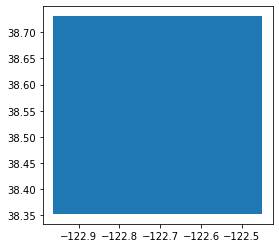

In [97]:
import geopandas as gpd
import fiona
fiona.drvsupport.supported_drivers['kml'] = 'rw' # enable KML support which is disabled by default
fiona.drvsupport.supported_drivers['KML'] = 'rw' # enable KML support which is disabled by default
fiona.drvsupport.supported_drivers['libkml'] = 'rw' # enable KML support which is disabled by default
fiona.drvsupport.supported_drivers['LIBKML'] = 'rw'
filename = '2090_rcp45_banana633/Farsite Fireline Intensity -- testing_output.kmz'

#kmz = ZipFile(filename, 'r')
#kml = kmz.extract('doc.kml', 'r')

a = gpd.read_file(filename)
a.plot()

In [98]:
a

,Name,description,timestamp,begin,end,altitudeMode,tessellate,extrude,visibility,drawOrder,icon,geometry
0,Farsite Fireline Intensity,None,None,None,None,None,None,None,-1,-1,files/FarsiteFirelineIntensity.png,"POLYGON Z ((-122.45000 38.73090 0.00000, -122...."


In [99]:
#import sys
import zipfile
#import glob
from xml.dom import minidom

def kmz_to_kml(fname):
    """save kmz to kml"""
    zf = zipfile.ZipFile(fname,'r')
    for fn in zf.namelist():
        if fn.endswith('.kml'):
            content = zf.read(fn)
            xmldoc = minidom.parseString(content)
            out_name = (fname.replace(".kmz",".kml")).replace("\\","/")
            out = open(out_name,'w')
            out.writelines(xmldoc.toxml())
            out.close()
        else:
            print("no kml file")

In [100]:
kmz_to_kml(filename)

no kml file
no kml file


In [101]:
kml = kmz.open('2090_rcp45_banana633/Farsite Fireline Intensity -- testing_output.kml', 'r').read()

KeyError: "There is no item named '2090_rcp45_banana633/Farsite Fireline Intensity -- testing_output.kml' in the archive"